In [10]:
%load_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
import pandas as pd
import xarray as xr

import json

import _pickle as cPickle


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
# load json file
for day in range(20210601,20210622):
    day = str(day)
    with open('/home/kbrennan/phd/data/climate/tracks/present/test/cell_tracks_'+day+'.json', 'r') as f:
        js_new = json.load(f)

    with open('/home/kbrennan/phd/data/climate/tracks/present/cell_tracks_'+day+'.json', 'r') as f:
        js_old = json.load(f)

    ds = xr.open_dataset('/home/kbrennan/phd/data/climate/tracks/present/test/cell_swaths_'+day+'.nc')

    print(np.round(len(js_new['cell_data'])/len(js_old['cell_data']),2),len(js_new['cell_data']),len(js_old['cell_data']))

0.23 7 31
0.41 15 37
0.22 11 50
0.59 13 22
0.54 37 69
0.69 9 13
0.71 10 14
0.25 17 68
0.37 7 19
1.54 20 13
0.44 12 27
0.1 3 30
0.08 4 51
0.04 2 53
0.3 10 33
0.46 25 54
1.02 49 48
0.67 34 51
1.09 123 113
0.86 125 145
0.95 146 153


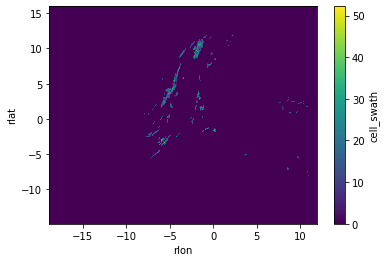

In [19]:
ds.cell_swath.max(dim='cell_id').plot()